Frequency-weighting for hypothetical group "mid-range" marine mammals. Functional hearing range according to Southal et al. (2007), table 2, p 430. 

Use this filter when there is no audiogram data for one of these genera: *Steno, Sousa, Sotalia, Tursiops, Stenella, Delphinus, Lagenodelphis, Lagenorhynchus, Lissodelphis, Grampus, Peponocephala, Feresa, Pseudorca, Orcinus, Globicephala, Orcaella, Physeter, Delphinapterus, Monodon, Ziphius, Berardius, Tasmacetus, Hyperoodon, Mesoplodon*

Estimated functinal bandwidth: 150 Hz to 160 kHz

In [96]:
# import the FFT scripts
source("FFT.R")

In [93]:
f <- c(18.75, 37.5, 75, 150, 300, 600, 1200, 2400, 4800, 9600, 19200,38400)/1000
g <- c(-42,-30,-18,-6,0,0,0,0,0,0,0,0)
filter.table <- data.frame(f,g)
colnames(filter.table) <- c("Frequency.in.kHz", "Gain.in.dB")
filter.table

Frequency.in.kHz,Gain.in.dB
<dbl>,<dbl>
0.01875,-42
0.03750,-30
0.07500,-18
0.15000,-6
0.30000,0
0.60000,0
1.20000,0
2.40000,0
4.80000,0


In [97]:
# sox command
inputfile <- "data/whitenoise.wav"
outputfile <- "data/M.ft_mid_frequency.wav"
Q <- 1.414 # 1 octave
command <- sox_command(inputfile, outputfile, filter.table, Q)
command

ERROR: Error in `[.data.frame`(filter.table, filter.table$Frequency.in.kHz < : undefined columns selected


In [99]:
filter.table[filter.table$Frequency.in.kHz < 24

[1]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 31 rows containing missing values (geom_smooth).”


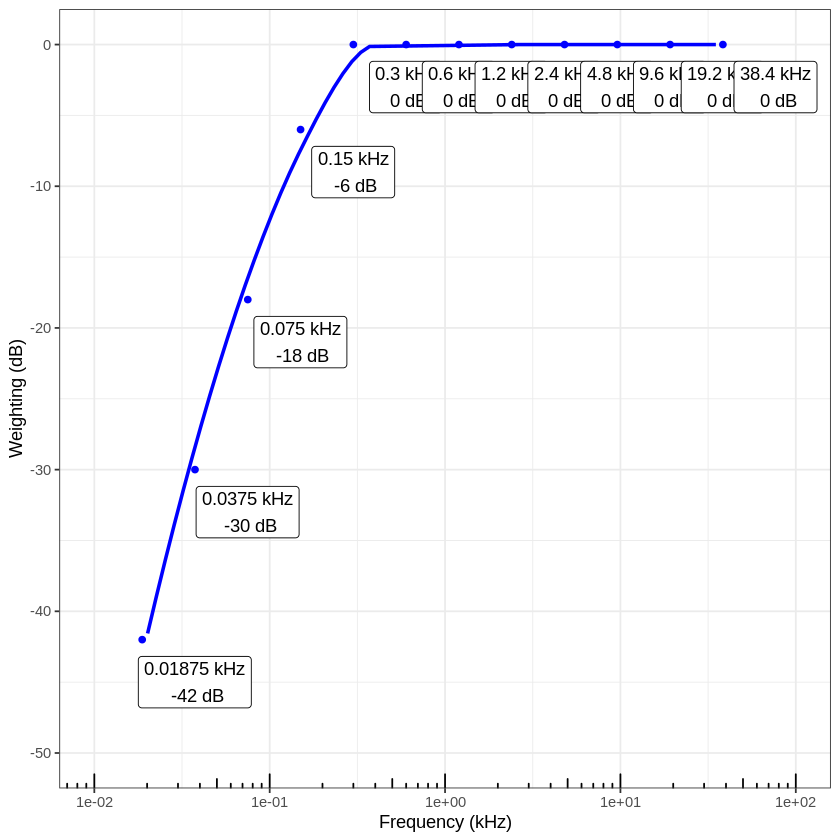

In [90]:
# plot the filtered data and the filter values
plot_filter(filter.table)

## References
Southall, B.L., Bowles, A.E., Ellison, W.T., Finneran, J.J., Gentry, R.L., Greene Jr, C.R., Kastak, D., Ketten, D.R., Miller, J.H., Nachtigall, P.E. and Richardson, W.J., 2007. Overview. Aquatic mammals, 33(4), p.411.